### This notebook explores the Number of updates on COVID-19 local situation (Singapore) on Ministry of Health's website since January. 

Data is first scraped off the website using BeautifulSoup and then Plotly is used to build an interactive visualization. Some static charts are also created using Seaborn. The data contains updates between 2 Jan 2020 and 25 March 2020.

In [1]:
from urllib.request import Request, urlopen
import requests
from bs4 import BeautifulSoup
import csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
import re

In [4]:
site = "https://www.moh.gov.sg/covid-19/past-updates"
hdr = {'User-Agent': 'Mozilla/5.0'}
bookpage = requests.get(site)
soup = BeautifulSoup(bookpage.text, "html.parser")
#print(soup.prettify())

In [5]:
soup.find_all('span')

[<span class="sgds-icon sgds-icon-sg-crest"></span>,
 <span>A Singapore Government Agency Website</span>,
 <span class="sr-only">Toggle navigation</span>,
 <span class="sgds-icon sgds-icon-menu"></span>,
 <span class="sgds-icon sgds-icon-search"></span>,
 <span class="caret"></span>,
 <span class="caret"></span>,
 <span class="caret"></span>,
 <span class="sgds-icon sgds-icon-search"></span>,
 <span class="sgds-icon sgds-icon-search"></span>,
 <span class="last">26 Mar 2020</span>,
 <span style="font-family: Arial; font-size: 16px;">Find past updates on the COVID-19 (Coronavirus Disease 2019) situation in Singapore below. <em>For the latest updates, please click </em><strong><a href="/covid-19" target="_blank"><em>here</em></a></strong>.</span>,
 <span style="font-size: 16px;"><strong><span style="font-family: Arial;"> Updates</span></strong></span>,
 <span style="font-family: Arial;"> Updates</span>,
 <span style="font-size: 16px; font-family: Arial;"><strong>Date</strong><br/></span>

In [6]:
len(soup.find_all('span'))

724

In [7]:
soup.find_all('span')[16]

<span style="font-family: Arial; font-size: 16px;">25 Mar 2020</span>

In [8]:
soup.find_all('span')[17]

<span style="font-family: Arial;"><span style="font-size: 16px;"><a class="" href="https://www.ica.gov.sg/careers/news-and-publications/media-releases/media-release/travellers-arriving-in-singapore-will-receive-advance-notification-of-stay-home-notice-requirements" target="_blank" title="">Travellers Arriving In Singapore Will Receive Advance Notification Of Stay-Home Notice Requirements</a> - Immigration &amp; Checkpoints Authority (ICA) </span></span>

In [9]:
soup.find_all('span')[18].get_text()

'Travellers Arriving In Singapore Will Receive Advance Notification Of Stay-Home Notice Requirements - Immigration & Checkpoints Authority (ICA)\xa0'

In [10]:
soup.find_all('span')[19].get_text()

'25 Mar 2020'

In [11]:
soup.find_all('span')[21].get_text()

'25 Mar 2020'

In [12]:
soup.find_all('span')[710]

<span style="font-family: Arial; font-size: 16px;">10 Jan 2020</span>

In [13]:
soup.find_all('span')[711]

<span style="font-family: Arial; font-size: 16px;"><a class="" href="https://www.moh.gov.sg/news-highlights/details/update-on-local-situation-regarding-severe-pneumonia-cluster-in-wuhan-10-jan" target="_blank" title="">Update on Local Situation Regarding Severe Pneumonia Cluster in Wuhan</a></span>

In [14]:
soup.find_all('span')[714]

<span style="font-family: Arial; font-size: 16px;">04 Jan 2020</span>

In [15]:
chunk = []
for i in range(0,715-16):
    c = soup.find_all('span')[i+16].get_text().replace(u'\xa0', u'')
    chunk.append((c))

In [16]:
chunk

['25 Mar 2020',
 'Travellers Arriving In Singapore Will Receive Advance Notification Of Stay-Home Notice Requirements - Immigration & Checkpoints Authority (ICA)',
 'Travellers Arriving In Singapore Will Receive Advance Notification Of Stay-Home Notice Requirements - Immigration & Checkpoints Authority (ICA)',
 '25 Mar 2020',
 'Five More Cases Discharged; 73 News Cases of COVID-19 Infection Confirmed',
 '25 Mar 2020',
 '[Updated] Advisory for Individuals Sharing Residential Spaces with Persons issued Stay-Home Notice',
 '[Updated] Advisory for Individuals Sharing Residential Spaces with Persons issued Stay-Home Notice',
 '25 Mar 2020',
 '[Updated] Health Advisory for Persons issued Stay-Home Notice (SHN)',
 '25 Mar 2020',
 '[Updated]Advisory for Individuals Sharing Residential Spaces with Persons issued Stay-Home Notice (SHN)(25 Mar 2020)',
 '[Updated]Advisory for Individuals Sharing Residential Spaces with Persons issued Stay-Home Notice (SHN)(25 Mar 2020)',
 '25 Mar 2020',
 'Measures

In [17]:
df = pd.DataFrame(np.array(chunk))

In [18]:
df.columns = ['text']

In [19]:
df

text
0                                          25 Mar 2020
1    Travellers Arriving In Singapore Will Receive ...
2    Travellers Arriving In Singapore Will Receive ...
3                                          25 Mar 2020
4    Five More Cases Discharged; 73 News Cases of C...
5                                          25 Mar 2020
6    [Updated] Advisory for Individuals Sharing Res...
7    [Updated] Advisory for Individuals Sharing Res...
8                                          25 Mar 2020
9    [Updated] Health Advisory for Persons issued S...
10                                         25 Mar 2020
11   [Updated]Advisory for Individuals Sharing Resi...
12   [Updated]Advisory for Individuals Sharing Resi...
13                                         25 Mar 2020
14   Measures to Prevent Congregations of Foreign W...
15                                         25 Mar 2020
16   Employers Advised To Plan For More Sustainable...
17                                         25 Mar 2020
18   Singapore Permanent Resident Failed To Declare...
19                                         25 Mar 2020
20   Entry Approval and Stay-Home Notice Requiremen...
21   Entry Approval and Stay-Home Notice Requiremen...
22                                         25 Mar 2020
23   Stepped Up Precautionary Measures against COVI...
24   Stepped Up Precautionary Measures against COVI...
25                                         25 Mar 2020
26   Ministerial Statement by Minister Lawrence Won...
27                                         25 Mar 2020
28   Statement by Mr Gan Kim Yong, Minister for Hea...
29                                         25 Mar 2020
..                                                 ...
669                                        23 Jan 2020
670  Confirmed Imported Case of Novel Coronavirus I...
671  Confirmed Imported Case of Novel Coronavirus I...
672                                        23 Jan 2020
673  Further Update to Preschools on Measures in Re...
674                                        23 Jan 2020
675  MOH Updates Public Health Travel Advisory in R...
676                                        22 Jan 2020
677                                        22 Jan 2020
678                                        21 Jan 2020
679  Update on Local Situation Regarding Severe Pne...
680                                        21 Jan 2020
681  Additional Precautionary Measures in Response ...
682                                        20 Jan 2020
683  Update on Local Situation Regarding Severe Pne...
684                                        20 Jan 2020
685  MOH Steps Up Precautionary Measures in Respons...
686                                        18 Jan 2020
687  Update on Local Situation Regarding Severe Pne...
688                                        17 Jan 2020
689  Update on Local Situation Regarding Severe Pne...
690                                        16 Jan 2020
691  Update on Local Situation Regarding Severe Pne...
692                                        11 Jan 2020
693  Update on Local Situation Regarding Severe Pne...
694                                        10 Jan 2020
695  Update on Local Situation Regarding Severe Pne...
696                                        05 Jan 2020
697  Update on local situation regarding severe pne...
698                                        04 Jan 2020

[699 rows x 1 columns]

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [21]:
pd.DataFrame(df[df['text'].str.contains("2020")]['text'].value_counts())

text
25 Mar 2020                                                                                                                                                                       17  
20 Mar 2020                                                                                                                                                                       11  
27 Jan 2020                                                                                                                                                                       10  
31 Jan 2020                                                                                                                                                                       9   
14 Feb 2020                                                                                                                                                                       8   
15 Mar 2020                                                                                                                                                                       7   
04 Feb 2020                                                                                                                                                                       7   
10 Mar 2020                                                                                                                                                                       7   
01 Feb 2020                                                                                                                                                                       7   
16 Mar 2020                                                                                                                                                                       7   
17 Feb 2020                                                                                                                                                                       6   
13 Mar 2020                                                                                                                                                                       6   
28 Jan 2020                                                                                                                                                                       6   
12 Feb 2020                                                                                                                                                                       6   
24 Feb 2020                                                                                                                                                                       6   
09 Feb 2020                                                                                                                                                                       6   
27 Feb 2020                                                                                                                                                                       6   
24 Mar 2020                                                                                                                                                                       6   
19 Mar 2020                                                                                                                                                                       6   
03 Feb 2020                                                                                                                                                                       6   
25 Feb 2020                                                                                                                                                                       6   
30 Jan 2020                                                                                                                                             

In [22]:
updates_count = pd.DataFrame(df[df['text'].str.contains("2020")]['text'].value_counts())

In [23]:
updates_count = updates_count.reset_index()

In [24]:
updates_count['text_len'] = updates_count['index'].apply(len)

In [25]:
updates_count.head()

index  text  text_len
0  25 Mar 2020  17    11      
1  20 Mar 2020  11    11      
2  27 Jan 2020  10    11      
3  31 Jan 2020  9     11      
4  14 Feb 2020  8     11

In [26]:
updates_count = updates_count[updates_count['text_len']<=11]

In [27]:
updates_count

index  text  text_len
0   25 Mar 2020  17    11      
1   20 Mar 2020  11    11      
2   27 Jan 2020  10    11      
3   31 Jan 2020  9     11      
4   14 Feb 2020  8     11      
5   15 Mar 2020  7     11      
6   04 Feb 2020  7     11      
7   10 Mar 2020  7     11      
8   01 Feb 2020  7     11      
9   16 Mar 2020  7     11      
10  17 Feb 2020  6     11      
11  13 Mar 2020  6     11      
12  28 Jan 2020  6     11      
13  12 Feb 2020  6     11      
14  24 Feb 2020  6     11      
15  09 Feb 2020  6     11      
16  27 Feb 2020  6     11      
17  24 Mar 2020  6     11      
18  19 Mar 2020  6     11      
19  03 Feb 2020  6     11      
20  25 Feb 2020  6     11      
21  30 Jan 2020  5     11      
22  12 Mar 2020  5     11      
23  10 Feb 2020  5     11      
24  07 Feb 2020  5     11      
25  21 Mar 2020  5     11      
26  11 Feb 2020  5     11      
27  18 Feb 2020  4     11      
28  11 Mar 2020  4     11      
29  18 Mar 2020  4     11      
30  13 Feb 2020  4     11      
31  26 Feb 2020  4     11      
32  3 Mar 2020   4     10      
33  29 Jan 2020  4     11      
34  08 Feb 2020  4     11      
35  4 Mar 2020   4     10      
36  17 Mar 2020  4     11      
37  24 Jan 2020  4     11      
38  28 Feb 2020  3     11      
39  23 Mar 2020  3     11      
40  16 Feb 2020  3     11      
41  6 Mar 2020   3     10      
42  02 Feb 2020  3     11      
43  15 Feb 2020  3     11      
44  23 Jan 2020  3     11      
45  22 Mar 2020  3     11      
46  21 Jan 2020  2     11      
48  9 Mar 2020   2     10      
49  29 Feb 2020  2     11      
50  8 Mar 2020   2     10      
51  23 Feb 2020  2     11      
52  05 Feb 2020  2     11      
56  26 Jan 2020  2     11      
59  22 Jan 2020  2     11      
61  14 Mar 2020  2     11      
62  1 Mar 2020   2     10      
63  5 Mar 2020   2     10      
64  20 Jan 2020  2     11      
66  10 Jan 2020  1     11      
67  20 Feb 2020  1     11      
69  18 Jan 2020  1     11      
72  04 Jan 2020  1     11      
74  22 Feb 2020  1     11      
76  17 Jan 2020  1     11      
78  05 Jan 2020  1     11      
79  06 Feb 2020  1     11      
80  7 Mar 2020   1     10      
81  11 Jan 2020  1     11      
86  21 Feb 2020  1     11      
87  2 Mar 2020   1     10      
91  25 Jan 2020  1     11      
93  19 Feb 2020  1     11      
95  16 Jan 2020  1     11

In [28]:
updates_count['date'] = pd.to_datetime(updates_count['index'])

In [29]:
updates_count.head()

index  text  text_len       date
0  25 Mar 2020  17    11       2020-03-25
1  20 Mar 2020  11    11       2020-03-20
2  27 Jan 2020  10    11       2020-01-27
3  31 Jan 2020  9     11       2020-01-31
4  14 Feb 2020  8     11       2020-02-14

In [30]:
updates_count.dtypes

index       object        
text        int64         
text_len    int64         
date        datetime64[ns]
dtype: object

In [31]:
date_list = pd.DataFrame({'date': pd.date_range(start='2020-01-02', end='2020-03-25', freq='D')})

In [32]:
date_list.dtypes

date    datetime64[ns]
dtype: object

In [33]:
updates_daily = pd.merge(date_list,updates_count,on='date',how='left')

In [34]:
updates_daily = updates_daily.fillna(0)

In [35]:
updates_daily.head()

date        index  text  text_len
0 2020-01-02  0            0.0   0.0     
1 2020-01-03  0            0.0   0.0     
2 2020-01-04  04 Jan 2020  1.0   11.0    
3 2020-01-05  05 Jan 2020  1.0   11.0    
4 2020-01-06  0            0.0   0.0

### Interactive chart 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import plotly.graph_objects as go

In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=updates_daily['date'],
    y=updates_daily['text'],
    hovertext=updates_daily[['date','text']].values,
    hoverinfo="x+y+text",
    marker=dict(
        color="green"
    ),
    showlegend=False
))

fig.update_layout(
    title="Number of updates on COVID-19 local situation on Ministry of Health's website"#,
    #xaxis_title="x Axis Title",
    #yaxis_title="y Axis Title",
    #font=dict(
    #    family="Courier New, monospace",
    #    size=18,
    #    color="#7f7f7f"
    )

fig.show()

In [42]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot

In [43]:
plot(fig, filename='mohcovid.html')

'mohcovid.html'

### Static charts

C:\Users\chua1\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



[Text(0, 0.5, 'Number of news updates'), Text(0.5, 0, 'Date')]

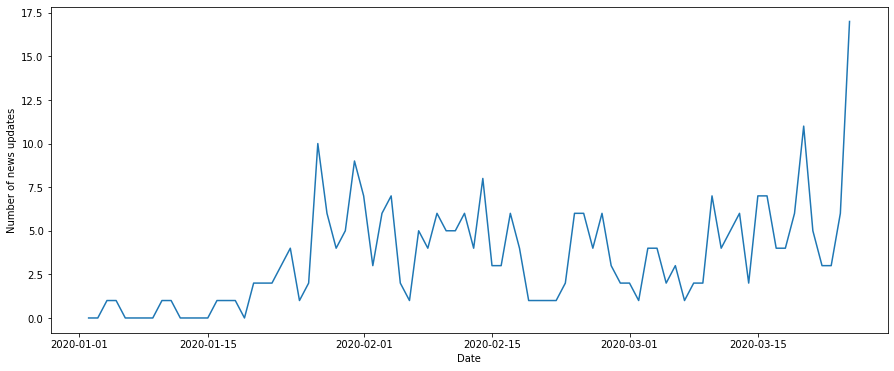

In [39]:
f, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x='date', y='text', data=updates_daily)
ax.set(xlabel='Date', ylabel='Number of news updates')

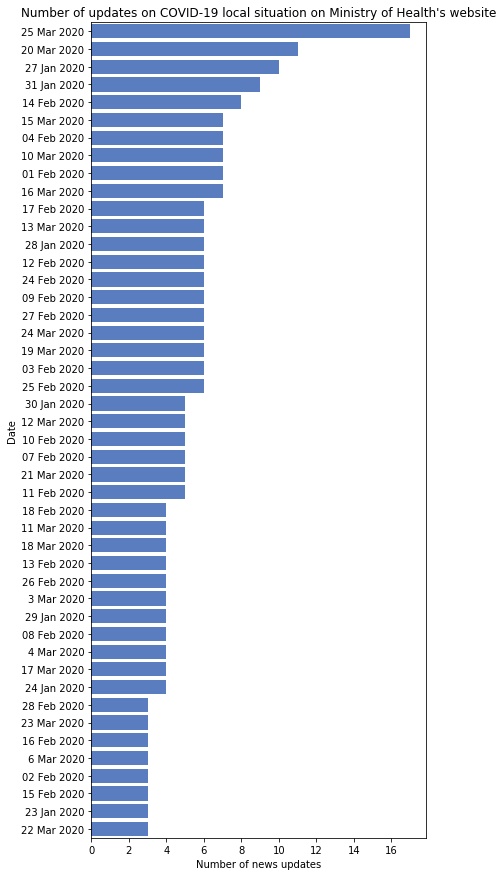

In [40]:
f, ax = plt.subplots(figsize = (6,15))
sns.set_color_codes('muted')
sns.barplot(x = 'text', y = 'index', data = updates_count[updates_count['text']>=3], color = 'b')
plt.title("Number of updates on COVID-19 local situation on Ministry of Health's website")
ax.set(ylabel='Date', xlabel='Number of news updates')
plt.show()